In [ ]:

"""
This script is for linear regression model. It uses
sklearn library for creating datasets and to build
the model. It also uses pandas, matplotlib, seaborn
for data manipulation and visualization.
"""
import pandas as pd     # For data manipulation
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns    # For data visualization
import sklearn.datasets as skds      # For creating datasets
from sklearn.preprocessing import MinMaxScaler   # For feature scaling
from sklearn.model_selection import train_test_split     # For splitting data into train and test sets
from sklearn.linear_model import LinearRegression    # For building the linear regression model
from sklearn.metrics import r2_score     # For evaluating the model


In [ ]:
# Generate a regression dataset with 1000 samples, 5 features, and 1 target variable
x = skds.make_regression(n_samples=1000, n_features=5, n_targets=1, noise=0)

# Create a DataFrame from the generated features
df = pd.DataFrame(x[0], columns=[f"col{i}" for i in range(5)])

# Add the target variable to the DataFrame
df['target'] = x[1]

In [ ]:
df.corr()

In [ ]:
# Iterate over each column in the DataFrame
for i in df.columns:
    # Apply MinMaxScaler to scale each column to the range [0, 1]
    df[i] = MinMaxScaler().fit_transform(df[[i]])

In [ ]:
# Iterate over each column in the DataFrame
for i in df.columns:
    # Create a regression plot for each feature column against the target variable
    sns.regplot(x=df[i], y=df['target'])
    # Display the plot
    plt.show()

In [ ]:
# Split the DataFrame into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(['target'], axis=1), df['target'], test_size=0.8, random_state=42)


In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(xtrain, ytrain)

model

LinearRegression()

In [59]:
# Use the trained model to make predictions on the test and train data
ypredict_test = model.predict(xtest)
ypredict_train = model.predict(xtrain)

In [60]:
# Calculate the R^2 score to evaluate the performance of the linear regression model
# The R^2 score indicates how well the model's predictions match the actual values
# It ranges from 0 to 1, with 1 indicating perfect predictions
r2_score(ytest, ypredict_test) , r2_score(ytrain , ypredict_train)


(1.0, 1.0)

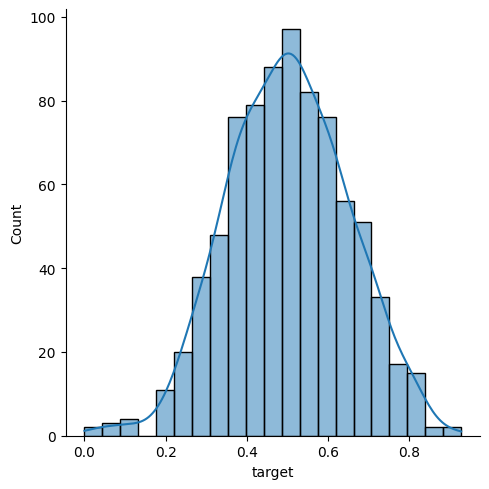

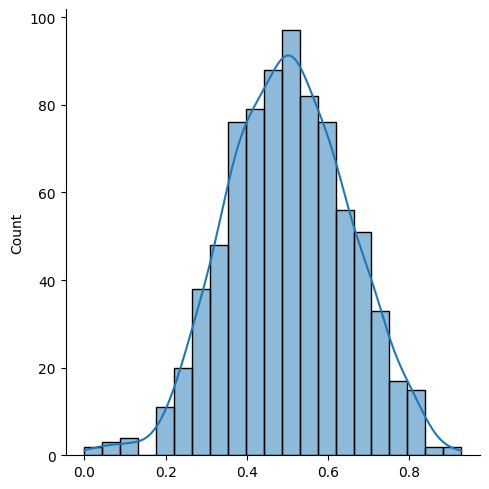

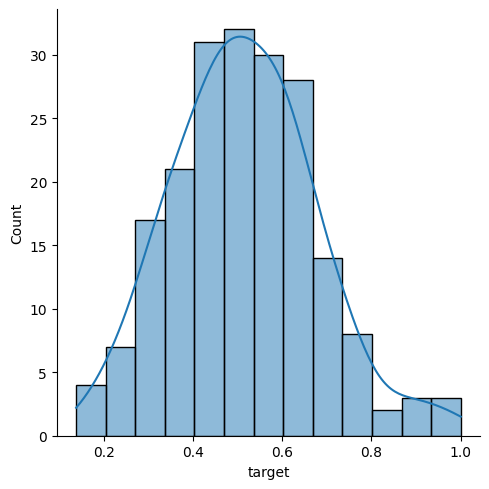

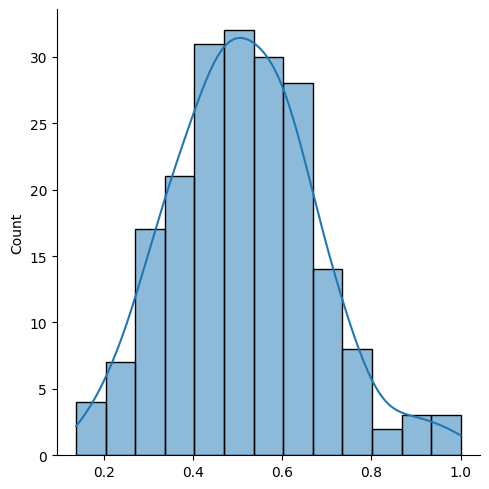

In [ ]:
col = [ytest , ypredict_test , ytrain , ypredict_train]
for i in col:
    sns.displot(i , kde = True)
    plt.show()